# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 18.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
36997,0.2197,0.4565,0.1636,0.0562,0.0024,0.0024,0.0879,0.4053,0.0952,0.4126,0,0,0,0
104682,0.1929,0.0024,0.0024,0.0024,0.0024,0.0024,0.0708,0.2368,0.0024,0.0757,4,0,1,0
448744,0.8691,0.2441,0.0977,0.1440,0.0269,0.0269,0.1367,1.2427,0.0049,0.2173,5,5,22,22
397466,0.8130,0.0195,0.0073,0.0024,0.0024,0.0024,0.0684,1.0522,0.0024,0.0122,7,7,17,17
232139,0.0952,0.0024,0.0024,0.0024,0.0024,0.0366,0.1782,0.0830,0.0024,0.0244,0,0,0,0


In [3]:
raw_data.shape

(465533, 14)

In [4]:
raw_data.columns

Index(['Emg1', 'Emg2', 'Emg3', 'Emg4', 'Emg5', 'Emg6', 'Emg7', 'Emg8', 'Emg9',
       'Emg10', 'repetition', 'rerepetition', 'stimulus', 'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465533 entries, 0 to 465532
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          465533 non-null  float64
 1   Emg2          465533 non-null  float64
 2   Emg3          465533 non-null  float64
 3   Emg4          465533 non-null  float64
 4   Emg5          465533 non-null  float64
 5   Emg6          465533 non-null  float64
 6   Emg7          465533 non-null  float64
 7   Emg8          465533 non-null  float64
 8   Emg9          465533 non-null  float64
 9   Emg10         465533 non-null  float64
 10  repetition    465533 non-null  int64  
 11  rerepetition  465533 non-null  int64  
 12  stimulus      465533 non-null  int64  
 13  restimulus    465533 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 49.7 MB


In [6]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,465533.000000,465533.000000,465533.000000,465533.000000,465533.000000,465533.000000,465533.000000,465533.000000,465533.000000,465533.000000,465533.000000,465533.000000,465533.000000,465533.000000
mean,0.413167,0.117170,0.100465,0.060755,0.016404,0.034723,0.206456,0.394925,0.103675,0.206401,3.174965,2.367557,5.626065,4.255810
std,0.517157,0.271862,0.248185,0.184027,0.044366,0.095586,0.344918,0.450669,0.259265,0.352236,3.484753,3.325123,6.580095,6.332307
min,0.000000,0.000000,0.000000,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.105000,0.002400,0.002400,0.002400,0.002400,0.002400,0.024400,0.102500,0.002400,0.002400,0.000000,0.000000,0.000000,0.000000
50%,0.219700,0.002400,0.002400,0.002400,0.002400,0.002400,0.100100,0.261200,0.002400,0.087900,2.000000,0.000000,3.000000,0.000000
75%,0.507800,0.105000,0.063500,0.039100,0.004900,0.029300,0.239300,0.510300,0.065900,0.258800,6.000000,5.000000,10.000000,8.000000
max,4.665500,4.665500,3.601100,4.204100,0.988800,2.390100,4.663100,4.665500,3.337400,4.663100,10.000000,10.000000,23.000000,23.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     196783
12     15549
8      15546
7      15542
2      15538
5      15535
4      15520
11     15516
9      15512
6      15499
10     15472
1      15463
3      15462
13     10372
17     10362
14     10353
15     10321
16     10282
21      5181
18      5170
19      5169
20      5132
23      5132
22      5122
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

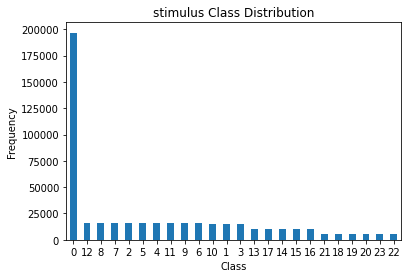

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [11]:
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
331730,1.0474,0.3906,0.2124,0.0586,0.0269,0.1074,0.3418,0.7056,0.1440,0.2051,5,5,10,10
38682,0.0708,0.0439,0.0806,0.0024,0.0024,0.0024,0.0098,0.2979,0.0024,0.2295,0,0,0,0
180989,0.1440,0.0024,0.0146,0.0098,0.0024,0.0342,0.6201,0.6274,0.0610,0.8569,5,5,10,10
228611,0.1416,0.0024,0.0024,0.0024,0.0024,0.0342,0.1050,0.1123,0.0024,0.0024,0,0,0,0
403249,0.0220,0.0024,0.0024,0.0024,0.0024,0.0024,0.0879,0.0024,0.0024,0.0024,0,0,0,0


In [12]:
raw_data.shape

(380921, 14)

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380921 entries, 0 to 465532
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          380921 non-null  float64
 1   Emg2          380921 non-null  float64
 2   Emg3          380921 non-null  float64
 3   Emg4          380921 non-null  float64
 4   Emg5          380921 non-null  float64
 5   Emg6          380921 non-null  float64
 6   Emg7          380921 non-null  float64
 7   Emg8          380921 non-null  float64
 8   Emg9          380921 non-null  float64
 9   Emg10         380921 non-null  float64
 10  repetition    380921 non-null  int64  
 11  rerepetition  380921 non-null  int64  
 12  stimulus      380921 non-null  int64  
 13  restimulus    380921 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 43.6 MB


In [14]:
print(raw_data.isnull().any())

Emg1            False
Emg2            False
Emg3            False
Emg4            False
Emg5            False
Emg6            False
Emg7            False
Emg8            False
Emg9            False
Emg10           False
repetition      False
rerepetition    False
stimulus        False
restimulus      False
dtype: bool


In [15]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# Scalling Data

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
X = StandardScaler().fit_transform(X)

# Indipendent Component Analysis (ICA)

https://www.nmr.mgh.harvard.edu/mne/0.14/manual/preprocessing/ica.html

In [18]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=10)
X_ica = ica.fit_transform(X)

In [19]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_ica, y, test_size = 0.2, random_state = 39)

# Machine Learning Models

In [20]:
from sklearn import tree
tree = tree.DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
y_pred1 = tree.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred1)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred1)* 100}")

Accuracy is: 81.64730590011156


Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.91      0.91     37921
           1       0.75      0.76      0.75      2329
           2       0.73      0.76      0.74      2183
           3       0.70      0.70      0.70      2198
           4       0.76      0.77      0.76      1991
           5       0.72      0.73      0.72      2138
           6       0.75      0.75      0.75      2215
           7       0.72      0.71      0.72      2208
           8       0.69      0.69      0.69      2271
           9       0.66      0.66      0.66      2148
          10       0.68      0.67      0.67      2046
          11       0.70      0.73      0.72      2208
          12       0.64      0.61      0.63      1979
          13       0.75      0.74      0.74      1438
          14       0.71      0.72      0.72      1369
          15       0.64      0.63      0.63      1583
          16       0.76      0.75      0.76      1564
 

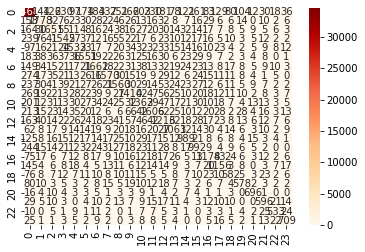

In [23]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred1))

cm = confusion_matrix(y_pred1, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Decision Tree

In [24]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 1.4134540920128633
MSE: 15.700702237973355
RMSE: 3.962411164679071


In [25]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred1, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred1,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred1,average='weighted'))

Precision Score :  0.816140713656081
Recall Score :  0.8164730590011157
f1_score :  0.8162618878390676


# KNeighborsClassifier

In [26]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier()
KNeighborsClassifier.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
y_pred2 = KNeighborsClassifier.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred2)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred2)* 100}")

Accuracy is: 91.25812167749558


Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     37921
           1       0.92      0.90      0.91      2329
           2       0.92      0.90      0.91      2183
           3       0.90      0.83      0.87      2198
           4       0.93      0.89      0.91      1991
           5       0.94      0.87      0.90      2138
           6       0.94      0.86      0.90      2215
           7       0.90      0.81      0.85      2208
           8       0.91      0.82      0.86      2271
           9       0.87      0.79      0.83      2148
          10       0.90      0.81      0.86      2046
          11       0.91      0.83      0.87      2208
          12       0.90      0.82      0.86      1979
          13       0.92      0.87      0.90      1438
          14       0.92      0.83      0.87      1369
          15       0.85      0.72      0.78      1583
          16       0.95      0.86      0.90      1564
 

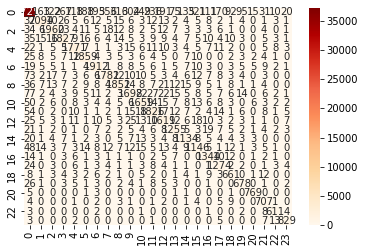

In [29]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred2))

cm = confusion_matrix(y_pred2, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- KNeighborsClassifier

In [30]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 0.7332545776727702
MSE: 8.48412417142482
RMSE: 2.9127519927767316


In [31]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred2, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred2,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred2,average='weighted'))

Precision Score :  0.9127777058945198
Recall Score :  0.9125812167749557
f1_score :  0.9110167783629182


# ExtraTreesClassifier

In [32]:
from sklearn.ensemble import ExtraTreesClassifier
extratree = ExtraTreesClassifier()
extratree.fit(X_train, y_train)

ExtraTreesClassifier()

In [33]:
y_pred5 = extratree.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred5)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred5)* 100}")

Accuracy is: 93.13513158758285


Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     37921
           1       0.96      0.92      0.94      2329
           2       0.98      0.92      0.95      2183
           3       0.96      0.85      0.90      2198
           4       0.98      0.91      0.94      1991
           5       0.97      0.88      0.93      2138
           6       0.98      0.88      0.93      2215
           7       0.95      0.81      0.88      2208
           8       0.95      0.84      0.89      2271
           9       0.94      0.82      0.87      2148
          10       0.95      0.84      0.89      2046
          11       0.95      0.87      0.91      2208
          12       0.96      0.87      0.91      1979
          13       0.95      0.92      0.94      1438
          14       0.93      0.87      0.90      1369
          15       0.85      0.79      0.82      1583
          16       0.97      0.90      0.93      1564
 

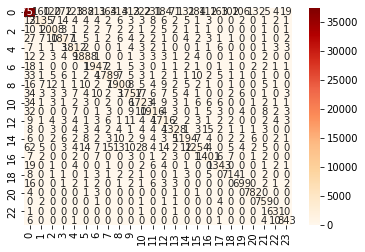

In [35]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred5))

cm = confusion_matrix(y_pred5, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- ExtraTreesClassifier

In [36]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred5))
print('MSE:', metrics.mean_squared_error(y_test, y_pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))

MAE: 0.6046334580297958
MSE: 7.150305178184682
RMSE: 2.674005455900321


In [37]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred5, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred5,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred5,average='weighted'))

Precision Score :  0.933362921401355
Recall Score :  0.9313513158758285
f1_score :  0.9304103474274683


# Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier()
RandomForestClassifier.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
y_pred3 = RandomForestClassifier.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred3)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred3)* 100}")

Accuracy is: 92.11393318894795


Classification report : 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     37921
           1       0.95      0.90      0.92      2329
           2       0.96      0.90      0.93      2183
           3       0.94      0.83      0.89      2198
           4       0.96      0.89      0.93      1991
           5       0.96      0.86      0.90      2138
           6       0.96      0.87      0.91      2215
           7       0.94      0.79      0.86      2208
           8       0.94      0.83      0.88      2271
           9       0.92      0.79      0.85      2148
          10       0.95      0.83      0.88      2046
          11       0.94      0.84      0.89      2208
          12       0.94      0.83      0.88      1979
          13       0.93      0.91      0.92      1438
          14       0.92      0.85      0.88      1369
          15       0.83      0.76      0.79      1583
          16       0.95      0.89      0.92      1564
 

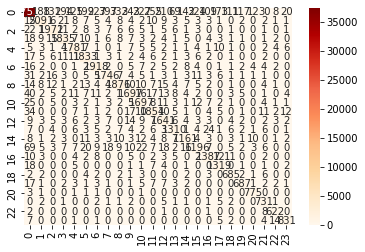

In [41]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred3))

cm = confusion_matrix(y_pred3, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Random Forest

In [42]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

MAE: 0.6780862374483166
MSE: 7.956789394237711
RMSE: 2.8207781540273085


In [43]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred3, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred3,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred3,average='weighted'))

Precision Score :  0.9229960501835568
Recall Score :  0.9211393318894796
f1_score :  0.9197627010207897


# XGBoost

In [44]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:33:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [45]:
y_pred4 = xgb.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred4)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred4)* 100}")

Accuracy is: 85.13224388002888


Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.98      0.92     37921
           1       0.81      0.77      0.79      2329
           2       0.83      0.78      0.81      2183
           3       0.83      0.68      0.75      2198
           4       0.86      0.76      0.81      1991
           5       0.85      0.72      0.78      2138
           6       0.91      0.76      0.83      2215
           7       0.87      0.68      0.77      2208
           8       0.78      0.66      0.72      2271
           9       0.78      0.63      0.70      2148
          10       0.82      0.66      0.73      2046
          11       0.84      0.71      0.77      2208
          12       0.71      0.63      0.66      1979
          13       0.82      0.79      0.81      1438
          14       0.80      0.74      0.77      1369
          15       0.69      0.66      0.67      1583
          16       0.86      0.77      0.81      1564
 

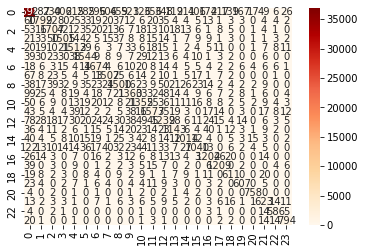

In [47]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred4))

cm = confusion_matrix(y_pred4, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- XGBoost

In [48]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

MAE: 1.1698497079477588
MSE: 13.153652293758613
RMSE: 3.626796422982494


In [49]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred4, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred4,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred4,average='weighted'))

Precision Score :  0.849546761221997
Recall Score :  0.8513224388002888
f1_score :  0.8465955106505971
